## Minicurso introdução ao Machine Learning

Já vimos os principais princípios teóricos que são a base da ciência de dados e do aprendizado de máquina. Agora é hora de colocarmos isso em prática usando Python. Vamos usar quatro bibliotecas no decorrer da prática:

`Pandas`: Biblioteca para lidar com dados tabelados

`Matplotlib`: Biblioteca para fazer gráficos

`Scikit-Learn`: Biblioteca para aprendizado de máquina

Evidentemente cada uma dessas bibliotecas é bem grande e demora um bom tempo para ser estudada, então nosso objetivo nesse minicurso é passar as principais funcionalidades de cada uma em uma aplicação prática. É um bom começo para quem pretende se aprofundar individualmente em cada uma no futuro.

No decorrer da prática estarão presentes várias perguntas para respondermos analisando os dados, assim será possivel entender como as ferramentas funcionam em um cenário real.

In [ ]:
# Vamos começar importando as bibliotecas
# (iremos importar o scikit-learn mais tarde conforme precisarmos)
import pandas as pd
import matplotlib.pyplot as plt

### Carregando os dados
Os dados podem estar em vários formatos, porem o mais comum é o arquivo `csv`. O Pandas possui um método proprio para carregar arquivos nesse formato, assim como em vários outros como `json`, `xls`, `SQL`, etc.

In [ ]:
# Vamos guardar o resultado em uma variavel chamada df
df = pd.read_csv('titanic.csv')

In [ ]:
# Vamos conferir qual o tipo desse objeto
type(df)

DataFrame é o objeto central do Pandas, ele possui várias funções para interpretar e manipular tabelas de dados

### Explorando os dados

In [ ]:
# .head() mostra as primeiras linhas da tabela
df.head()

>  Temos informaçoes a respeito de quantas pessoas?

In [ ]:
# .shape mostra o formato do DataFrame (linhas x colunas)
df.shape

In [ ]:
# .columns retorna o nome de cada coluna
df.columns

In [ ]:
# .dtypes mostra o tipo de cada coluna
df.dtypes

In [ ]:
# .describe() mostra várias estatísticas das variáveis
df.describe()

#### Acessando pedaços do DataFrame

In [ ]:
df.head()

É comum se encontrar em situações que queremos acessar apenas uma coluna do DataFrame ou que queremos olhar apenas um subconjunto de suas linhas.

> Qual é a média de idade das pessoas que estavam no Titanic?

In [ ]:
# Seleciona apenas a coluna idade
idades = df['Age']
idades

In [ ]:
# Podemos calcular por exemplo a média das idades
idades.mean()

> Qual a quantidade de homens na nossa base de dados?

In [ ]:
# Vamos criar um DataFrame somente com homens 
homens = df['Sex'] == 'male' # Lista de True/False indicando se o exemplo da linha é homem
df_homens = df[homens] # Seleciona apenas as listas com homens
df_homens.head()

In [ ]:
# Vamos ver o número de linhas
df_homens.shape

> Existe diferença na porcentagem de homens e de mulheres que sobreviveram?

In [ ]:
# Já criamos um DataFrame só com homens, vamos fazer isso com as mulheres
df_mulheres = df[df['Sex'] == 'female']
df_mulheres.head()

In [ ]:
# Vendo quais mulheres sobreviveram
mulheres_sobreviveram = df_mulheres['Survived'] == 1
# Contando quantas foram
n_mulheres_sobreviveram = mulheres_sobreviveram.sum()

# Vendo quais homens sobreviveram
homens_sobreviveram = df_homens['Survived'] == 1
# Contando quantos foram
n_homens_sobreviveram = homens_sobreviveram.sum()

print(n_mulheres_sobreviveram)
print(n_homens_sobreviveram)

In [ ]:
print('Mulheres:', n_mulheres_sobreviveram/df_mulheres.shape[0])
print('Homens:', n_homens_sobreviveram/df_homens.shape[0])

### Visualizando informações com gráficos

Muitas vezes utilizar gráficos facilitam o entendimento de certas caracteristicas dos dados, vamos um exemplo de gráfico e entender um pouco mais sobre nossos dados

> Como era a distribuição de tarifas do Titanic?

In [ ]:
# Podemos usar um histograma para visualizar essa informação
plt.hist(df['Fare']);

In [ ]:
# Podemos refinar nosso histrograma
plt.hist(df['Fare'], bins=50)
plt.xlim((0, 300));

In [ ]:
# Podemos colocar um título no nosso gráfico
plt.hist(df['Fare'], bins=50)
plt.xlim((0, 300))
plt.title('Distribuição das tarifas');

### Informações faltantes
Como foi dito antes é muito comum termos dados faltante quando estamos trabalhando com problemas reais. Vamos ver como nosso conjunto está nesse quesito.

In [ ]:
# Vendo o número de nulos em cada coluna
df.isna().sum()

Temos basicamente três opções de como lidar com esses dados faltantes:
    - Podemos remover as linhas que possuirem dados faltantes
    - Podemos remover as colunas que possuirem dados faltantes
    - Podemos substituir dados faltantes por algum valor (a média, por exemplo)

In [ ]:
# Podemos ver o número de nulos de forma percentual também
df.isna().sum() / df.shape[0]

Temos 3 colunas que apresentam valores nulos, porém cada uma delas será tratada de uma diferente.

- **Age**: Cerca de 20% dos valores dessa coluna são nulos, então vamos substituir os dados faltantes pela média dos valores da coluna
- **Cabin**: Essa coluna não possui 77% dos seus valores, portanto não há muito o que pode ser feito, vamos jogar ela toda fora.
- **Embarked**: Nesse caso só 0.2% das linhas possuem dados faltantes, vamos simplesmente remover essas linhas dos nossos dados

Temos dois métodos que vão nos ajudar a lidar com nulos `.fillna()` e `.dropna()`

`.fillna()` vai gerar uma cópia do que foi passado substituindo os valores nulos por um valor passado como parâmetro

In [ ]:
# Vamos calcular a média das idades
idade_media  = df['Age'].mean()

# Substituindo a coluna pela coluna com NaN sustituidos
df['Age'] = df['Age'].fillna(idade_media)

In [ ]:
# Vamos ver se até agora aconteceu o que queriamos
df.isna().sum()

`.dropna()` retorna um DataFrame sem as colunas ou linhas que possuem valores nulos. 

Temos parâmetros importantes: `axis` indica se deseja remover linhas (0) ou colunas (1), `subset` indica as labels do outro eixo que podem ser consideradas para remoção, `thresh` indica o número minimo de nulos para ser removida e `inplace` indica se a operação deve ser realizada no próprio DataFrame ou uma cópia deve ser retornada.

In [ ]:
# Vamos começar removendo a coluna Cabin
df.dropna(axis=1, thresh=600, inplace=True)
df.head()

In [ ]:
# Agora vamos remover as linhas que possuem Embarked nulo
df.dropna(axis=0, subset=['Embarked'], inplace=True)

In [ ]:
# Conferindo se limpamos tudo
df.isna().sum()

In [ ]:
# Conferindo a nova shape do DataFrame
df.shape

### Últimos preparativos antes do aprendizado

> Quais das nossas colunas parecem não ser muito úteis para prever se uma pessoa vai ou não sobreviver?

In [ ]:
df.head()

Para retirar as colunas que não serão relevantes vamos utilizar o método `.drop`

In [ ]:
# Removendo as colunas que não queremos
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
# Vendo o resultado
df.head()

#### Nosso algoritmo só aceita valores numéricos

É necessário transformar todas as features em valores númericos para podermos usalos em um modelo. Vamos pegar como exemplo a coluna COLUNA. Podemos ver que seus valores são strings, então é preciso de alguma forma transformá-los em números. Existem várias maneiras de fazer isso, mas podemos destacar duas principais formas básicas: *one-hot encoding* e *label encoding*. Vamos utilizar o seguinte exemplo:

| Salário | Altura |  Animal  | Comprou |
|:-------:|:------:|:--------:|:-------:|
| 2630,00 |   170  |   Gato   |    0    |
| 5650,00 |   169  | Cachorro |    1    |
| 1250,00 |   185  |   Peixe  |    1    |
| 8900,00 |   176  | Cachorro |    0    |


<u><i>One-hot Encoding:</i></u>

Utilizando o one-hot encoding iremos criar uma coluna para cada possível valor que a variável assume. Perceba que isso pode gastar muita memória, pense numa variável como "país" que pode assumir mais de 190 valores.

| Salário | Altura | Animal Gato | Animal Cachorro | Animal Peixe | Comprou |
|:-------:|:------:|:-----------:|:---------------:|:-----------:|:-------:|
| 2630,00 |   170  |      1      |        0        |      0      |    0    |
| 5650,00 |   169  |      0      |        1        |      0      |    1    |
| 1250,00 |   185  |      0      |        0        |      1      |    1    |
| 8900,00 |   176  |      0      |        1        |      0      |    0    |


<u><i>Label Encoding:</i></u>

Já no label encoding cada possível valor da feature é mapeado para um número inteiro. Porém isso cria uma relação de ordem entre os valores que não necessariamente é desejada.

| Salário | Altura | Animal | Comprou |
|:-------:|:------:|:------:|:-------:|
| 2630,00 |   170  |    0   |    0    |
| 5650,00 |   169  |    1   |    1    |
| 1250,00 |   185  |    2   |    1    |
| 8900,00 |   176  |    1   |    0    |

In [ ]:
# Primeiro iremos conferir quais atributos não são numericos
for col in df.columns:
    if df[col].dtype == object:
        print(col)

In [ ]:
# Aplicar o one-hor encoding é bem simples
df = pd.get_dummies(df)
df.head()

#### Deixando os dados na mesma escala
Para vários algoritmos é importante deixarmos os dados em uma mesma escala, e o kNN um desses casos. Para entender melhor vamos olhar o exemplo a seguir:

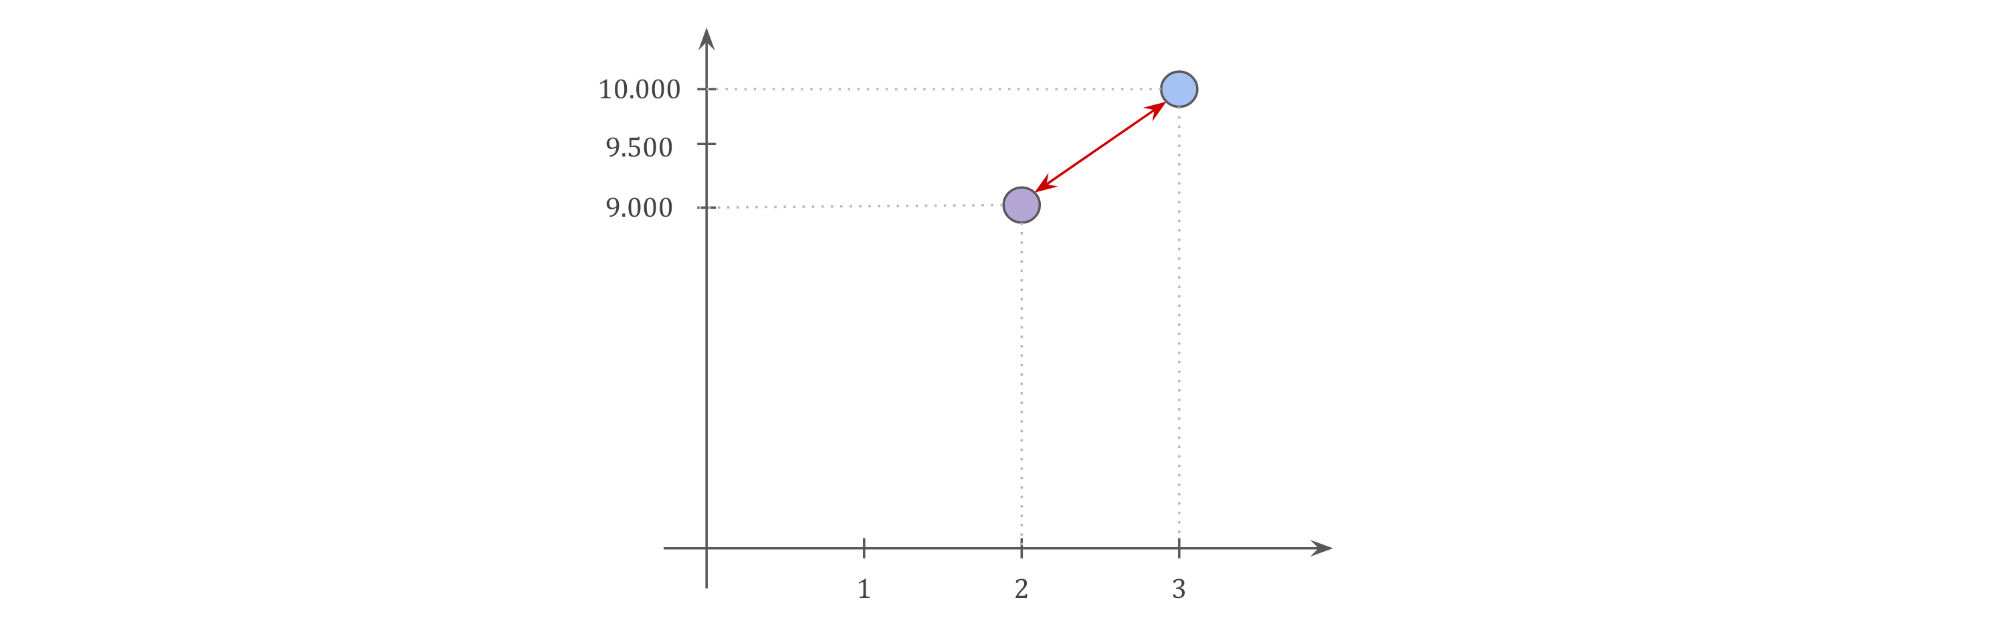

Nesse caso a distância entre os dois pontos é dada por

$$
\begin{align*}
\text{dist}(x^{(1)}, x^{(2)}) &= \sqrt{(x^{(1)}_1 - x^{(2)}_1)^2 + (x^{(1)}_2 - x^{(2)}_2)^2} \\
  &= \sqrt{(3 - 2)^2 + (10000 - 9000)^2} \\
  &= \sqrt{1 + 1000000} \\
  &= \sqrt{1000001} \\
  &= 1000.0005
\end{align*}$$

Como as escalas são muito diferentes o primeiro atributo acaba não interferindo em praticamente nada no resultado da distância. E é importante perceber que esse tipo de situação ocorre com frequência em conjuntos de dados reais.

Existem diversas formas de tratar essa situação, aqui usaremos uma técnica chamada **Min-Max Scaling**, que transforma os dados deixando-os no intervalo $[0, 1]$. A formula é da transformação é a seguinte:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - min(x_j)}{max(x_j) - min(x_j)}$$

Em palavras significa que vamos subtrair o menor valor da atributo e dividir pela amplitude (diferença entre o máximo e o mínimo).


Pronto, agora que entendemos podemos fazer fazer isso para todas as nossas colunas utilizando a função interna do scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Criando o objeto que faz a transformação
scaler = MinMaxScaler()
# Ajustando para tranformação (calculando min max)
scaler.fit(df)
# Aplicando as transformações
df_scaled = scaler.transform(df)

In [ ]:
# O retorna do scaling não é um DataFrame
type(df_scaled)

In [ ]:
# Transformando de volta em um DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

#### Dividindo nossos dados entre treino e validação
Vamos dividir nossos dados entre treino e validação, estratégia que vimos na parte teórica para avaliar o desempenho do nossos modelo.

In [ ]:
# Vamos colocar em variavel quais são nossas features e qual é o target
target = 'Survived'
features = list(df_scaled.columns)
features.remove(target)

print('Features:', features)
print('Target:', target)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_scaled[features], df_scaled[target], test_size=0.2)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

### Tudo pronto para treinarmos um modelo

In [ ]:
# Importando nosso classificador
from sklearn.neighbors import KNeighborsClassifier

# Criando o modelo que usa somento um vizinho
clf = KNeighborsClassifier(n_neighbors=3)
# Treinando o modelo nos dados de treino
clf.fit(X_train, y_train)

Vamos ver como esse modelo se comporta nos dados de validação que separamos

In [ ]:
# Assim podemos usar o modelo para prever a classe de novos exemplos
y_pred = clf.predict(X_val)

In [ ]:
# Importar a função que calcula a acurácia
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, y_pred)
print('Acurácia:', acc)

> Qual é o melhor número de vizinhos para utilizarmos?

In [ ]:
# Criando lista com todos os números de vizinhos que queremos testar
n_vizinhos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Variaval para guardar maior acuracia
maior_acc = 0
# Melhor numero de vizinhos
melhor_k = None

# Para cada numero de vizinhos
for k in n_vizinhos:
    # Criamos um modelo novo e treinamos ele
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    # Fazendo predição para os dados de validação e calculando acurácia
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Salvando o resultado se foi o melhor
    if acc > maior_acc:
        melhor_k = k
        maior_acc = acc
    
    # Mostrando o resultado
    print(f'{k} vizinhos: {acc}')    

In [ ]:
melhor_k

<hr>

Chegamos ao fim do minicurso de introdução a ciência de dados. Evidentemente muitas coisas não foram mencionadas por se tratarem de tecnicas mais avançadas, porém o material que foi exposto apresenta o suficiente para uma pessoa começar no mundo da ciência de dados. Existem várias outras técnicas de análise, pré-processamento e algortimos de aprendizado de máquina, então recomendados a todos que se interessaram a acompanharem as atividades do Data para aprenderem mais sobre o assunto!

Muito obrigado!